In [ ]:
#%matplotlib inline
#Import libraries

import numpy as np
import random
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
import copy
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n_cand = int(input("Enter number of candidates: "))

length = int(input("Length of Arena: "))
breadth = int(input("Breadth of Arena: ")) #for now keep both between 20 and 60


In [ ]:
xconf=[]
yconf=[]
for i in range(n_cand):
        temp_x=np.random.randint(0,length)
        temp_y=np.random.randint(0,breadth)
        # v,rec=check(rectconf,temp_x,temp_y)
        xconf.append(temp_x)
        yconf.append(temp_y)


NameError: ignored

In [ ]:
xconf

[32, 30, 27, 27, 34]

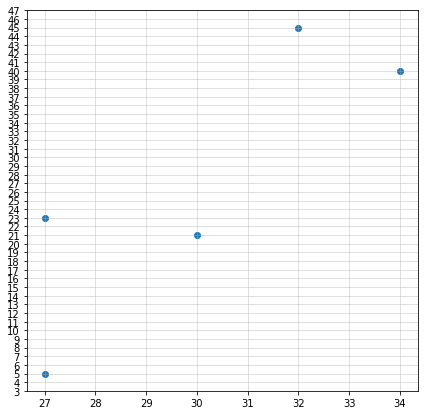

In [ ]:
fig = plt.figure()
fig.set_size_inches(7,7)
ax = fig.add_subplot(1, 1, 1)

x_ticks = np.arange(0, length, 1)
y_ticks = np.arange(0, breadth, 1)   # number of intervals


ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

plt.scatter(xconf,yconf)



ax.grid(which='both')
ax.grid(which='major', alpha=0.5)

plt.show()

In [ ]:

def showplt():
    fig = plt.figure()
    fig.set_size_inches(length/4,breadth/4)
    ax = fig.add_subplot(1, 1, 1)

    x_ticks = np.arange(0, length, 1)
    y_ticks = np.arange(0, breadth, 1)   # number of intervals


    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    plt.scatter(xconf,yconf)



    ax.grid(which='both')
    ax.grid(which='major', alpha=0.5)

    plt.show()

Light Intensity Function

In [ ]:
def light_int(c):
  dist_sq=(xconf[c]**2)+(yconf[c]**2)
  for cand in range (0,n_cand):
    height_diff = height(cand) - height(c)
    if dist_sq!=0:
              Li = (1/dist_sq + height_diff)                 # LIGHT INTENSITY IS INVERSELY PROPORTIONATE TO SQUARE OF DISTANCE
    else:
              Li = (999)

  return Li

In [ ]:
def light_int(c):
  dist_sq=(xconf[c]**2)+(yconf[c]**2)
  if dist_sq!=0:
            Li = (1/dist_sq)                 # LIGHT INTENSITY IS INVERSELY PROPORTIONATE TO SQUARE OF DISTANCE
  else:
            Li = (999)

  return Li

In [ ]:
light_int(1)

IndexError: ignored

Probability Function

In [ ]:
def probability(c):

    sum_all=0
    for i in range(n_cand):
         sum_all=sum_all + (light_int(i))

    prob = light_int(c) / sum_all

    return prob

In [ ]:
probability(0)

NameError: ignored

In [ ]:
print(xconf[0], yconf[0])
print(xconf[1], yconf[1])
print(xconf[2], yconf[2])
# print(xconf[3], yconf[3])
# print(xconf[4], yconf[4])

IndexError: ignored

In [ ]:
print(probability(0))
print(probability(1))
print(probability(2))
# print(probability(3))
# print(probability(4))

NameError: ignored

In [ ]:
def roulette():
    rw = []
    point = 0
    for i in range(0,n_cand):
      point = point + probability(i)
      rw.append(point)
    return rw

In [ ]:
rw = roulette()

In [ ]:
print(rw)

[0.0921876087460674, 0.3017923955221744, 0.5252264329361327, 0.8980116041122064, 1.0]


In [ ]:
def follows():                    #DONT CALL THIS FUNTION TWICE FOR THE SAME ITERATION
    gen_arr = []
    for i in range(n_cand):
        gen_arr.append(np.random.random())    #GENERATES RANDOM VALUES BW 0 AND 1

    leaders = []
    wheel = roulette()

    for i in range(n_cand):
            flag = 0
            for j in range(0,len(wheel)-1):
                if gen_arr[i] > wheel[j] and gen_arr[i] < wheel[j+1]:
                  #follow_matrix[i][1] = j+1
                  #print("candidate" ,i ,"follows ", (j+1))
                  leaders.append(j+1)
                  flag = 1
            if flag==0:
              #print("candidate" ,i ,"follows " ,0)
              leaders.append(0)



    return leaders, gen_arr

In [ ]:
leaders, generated = follows()

In [ ]:
print(generated)

[0.4311405547955707, 0.4239596808397097, 0.4021831566765379, 0.5816469405458923, 0.20272797712861024]


In [ ]:
print(leaders)

[2, 2, 2, 3, 1]


In [ ]:
rw = roulette()
print (rw)

[0.0921876087460674, 0.3017923955221744, 0.5252264329361327, 0.8980116041122064, 1.0]


#Find Theta Function

In [ ]:
def firsttheta():
  leaders, generated = follows()
  thetarray = []
  for i in range(n_cand):
      theta = 0
      xlead = xconf[leaders[i]]
      ylead = yconf[leaders[i]]
      xfollows = xconf[i]
      yfollows = yconf[i]
      followitself = 0
      dontchange = 0

      if xlead == xfollows:
        if ylead == yfollows:
          if xfollows!= 0:
            theta = math.degrees(math.atan(yfollows/xfollows))
            followitself = 1
          else:
            theta = 270
            followitself = 0
        else:
          if ylead > yfollows:
            theta = math.degrees(math.pi/2)
            dontchange = 1
          else:
            theta = math.degrees((3*(math.pi))/2)
            dontchange = 1
      if ylead == yfollows:
        if xlead > xfollows:
          theta = 0
          dontchange = 1
        else:
          if xlead < xfollows:
            theta = math.degrees(math.pi)
            dontchange = 1
      else:
        if (xlead != xfollows and ylead != yfollows):
          theta = math.degrees(math.atan((yfollows - ylead)/(xfollows - xlead)))
      #print('candidate ', xfollows, yfollows, 'follows candidate', xlead, ylead, 'and the old angle between them is ', theta)

      if dontchange == 0:
        if ((yfollows - ylead)<0):      #following candidate has to go up
          if ((xfollows - xlead)>0):
            theta = theta + 180  #2nd quadrant.  checked
          else:
            theta = theta       #1st quadrant. checked
        if ((yfollows - ylead)>0):      #following candidate has to go down
          if ((xfollows - xlead)>0):
            theta = theta + 180         #3rd quadrant.
          else:
            theta = 360 + theta         #4th quadrant checked
        if followitself == 1:
          theta = theta + 180         #3rd quadrant.
      thetarray.append(theta)
      #print('candidate ', xfollows, yfollows, 'follows candidate', xlead, ylead, 'and the new angle between them is ', theta, '\n')
  return thetarray

In [ ]:
thetarray = firsttheta()

In [ ]:
thetarray

[265.23635830927384,
 214.99202019855866,
 220.42607874009914,
 82.8749836510982,
 111.80140948635182]

In [ ]:

thetarray = []
# for i in range(n_cand):
theta = 0
xlead = 0
ylead = 3
xfollows = 0
yfollows = 3
followitself = 0
dontchange = 0

if xlead == xfollows:
  if ylead == yfollows:
    if xfollows!= 0:
      theta = math.degrees(math.atan(yfollows/xfollows))
      followitself = 1
    else:
      theta = 270
      followitself = 0
  else:
    if ylead > yfollows:
      theta = math.degrees(math.pi/2)
      dontchange = 1
    else:
      theta = math.degrees((3*(math.pi))/2)
      dontchange = 1
if ylead == yfollows:
  if xlead > xfollows:
    theta = 0
    dontchange = 1
  else:
    if xlead < xfollows:
      theta = math.degrees(math.pi)
      dontchange = 1
else:
  if (xlead != xfollows and ylead != yfollows):
    theta = math.degrees(math.atan((yfollows - ylead)/(xfollows - xlead)))
#print('candidate ', xfollows, yfollows, 'follows candidate', xlead, ylead, 'and the old angle between them is ', theta)

if dontchange == 0:
  if ((yfollows - ylead)<0):      #following candidate has to go up
    if ((xfollows - xlead)>0):
      theta = theta + 180  #2nd quadrant.  checked
    else:
      theta = theta       #1st quadrant. checked
  if ((yfollows - ylead)>0):      #following candidate has to go down
    if ((xfollows - xlead)>0):
      theta = theta + 180         #3rd quadrant.
    else:
      theta = 360 + theta         #4th quadrant checked
  if followitself == 1:
    theta = theta + 180         #3rd quadrant.
thetarray.append(theta)
#print('candidate ', xfollows, yfollows, 'follows candidate', xlead, ylead, 'and the new angle between them is ', theta, '\n')


#Now that we have theta, we will check the closest drection to it

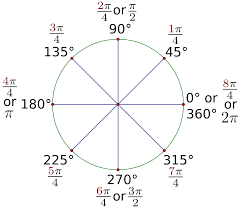

In [ ]:
def finddir():
    directions = []
    thetarray = firsttheta()
    #print("thetas of all candidates are. \n", thetarray, '\n\n')
    for theta in thetarray:

        if 0 <= theta <= 22.5:
          direc = 0
        if 22.5 < theta <= 67.5:
          direc = 45
        if 67.5 < theta <= 112.5:
          direc = 90
        if 112.5 < theta <= 157.5:
          direc = 135
        if 157.5 < theta <= 202.5:
          direc = 180
        if 202.5 < theta <= 247.5:
          direc = 225
        if 247.5 < theta <= 292.5:
          direc = 270
        if 292.5 < theta <= 337.5:
          direc = 315
        if 337.5 < theta <= 360:
          direc = 0
        directions.append(direc)
    return directions

#check directions

#MOVE FUNCTION CHECK

In [ ]:
xconf

[32, 30, 27, 27, 34]

In [ ]:
yconf

[45, 21, 23, 5, 40]

In [ ]:
for i in range(len(xconf)):
  print(probability(i))

0.0921876087460674
0.209604786776107
0.2234340374139583
0.3727851711760736
0.10198839588779372


In [ ]:
directions = finddir()

In [ ]:
def checkcand(c):

  candflag = 0
  if (xconf[c] ==0 and yconf[c] == 0):
    print('candidate ', c, 'has reached target!!!! :D')
    candflag = 1
  return candflag

In [ ]:
checkcand(0)

0

In [ ]:
newx = []
newy = []
for i in range(len(directions)):
  if checkcand(i) == 0:
    if directions[i] == 0:
      newx.append(xconf[i] + 1)
      newy.append(yconf[i])
    if directions[i] == 45:
      newx.append(xconf[i] + 1)
      newy.append(yconf[i] + 1)
    if directions[i] == 90:
      newx.append(xconf[i])
      newy.append(yconf[i] + 1)
    if directions[i] == 135:
      newx.append(xconf[i] - 1)
      newy.append(yconf[i] + 1)
    if directions[i] == 180:
      newx.append(xconf[i] - 1)
      newy.append(yconf[i])
    if directions[i] == 225:
      newx.append(xconf[i] - 1)
      newy.append(yconf[i] - 1)
    if directions[i] == 270:
      newx.append(xconf[i])
      newy.append(yconf[i] - 1)
    if directions[i] == 315:
      newx.append(xconf[i] + 1)
      newy.append(yconf[i] - 1)
    if directions[i] == 360:
      newx.append(xconf[i] + 1)
      newy.append(yconf[i])
  else:
      newx.append(0)
      newy.append(0)



In [ ]:
newx

[32, 30, 27, 26, 34]

In [ ]:
newy

[44, 22, 24, 5, 39]

In [ ]:
directions

[270, 90, 90, 180, 270]

In [ ]:
xconf = newx

In [ ]:
yconf = newy

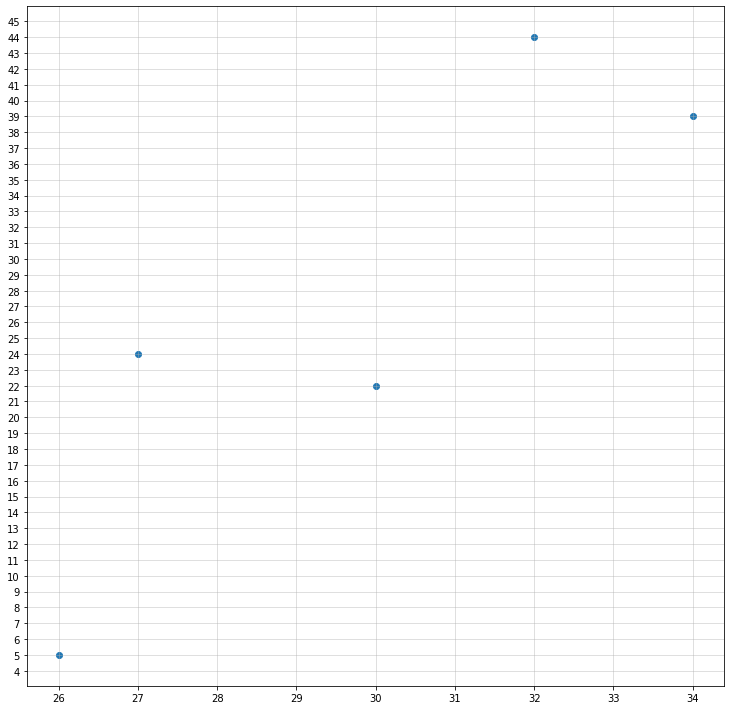

In [ ]:
showplt()

In [ ]:
if directions[i] == 0:
  newx.append(xconf[i] + 1)
  newy.append(yconf[i])
if directions[i] == 45:
  newx.append(xconf[i] + 1)
  newy.append(yconf[i] + 1)
if directions[i] == 90:
  newx.append(xconf[i])
  newy.append(yconf[i] + 1)
if directions[i] == 135:
  newx.append(xconf[i] - 1)
  newy.append(yconf[i] + 1)
if directions[i] == 180:
  newx.append(xconf[i] - 1)
  newy.append(yconf[i])
if directions[i] == 225:
  newx.append(xconf[i] - 1)
  newy.append(yconf[i] - 1)
if directions[i] == 270:
  newx.append(xconf[i])
  newy.append(yconf[i] - 1)
if directions[i] == 315:
  newx.append(xconf[i] + 1)
  newy.append(yconf[i] - 1)
if directions[i] == 360:
  newx.append(xconf[i] + 1)
  newy.append(yconf[i])


In [ ]:
yconf

[44, 22, 24, 5, 39, 38]

In [ ]:
newy

[44, 22, 24, 5, 39, 38]

In [ ]:
directions

[270, 90, 90, 180, 270]

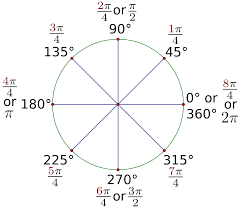

#MOVE FUNCTION FINALISE

In [ ]:
obstacle = []

In [ ]:
obstacle.append(3)

In [ ]:
def check_obst(newx, newy, xconf, yconf, matrix):
  obstacle = []
  for i in range(0,n_cand):
    #print('current i is ', i)

    if ((matrix[newx[i]][newy[i]] - matrix[xconf[i]][yconf[i]])**2 > 4):
        obstacle.append(1)
        print("ALT DIFF IS ", (matrix[newx[i]][newy[i]] - matrix[xconf[i]][yconf[i]]))
        print("OBSTACLE DETECTED IN FRONT OF CANDIDATE ", i)
    else:
        obstacle.append(0)
        print("ALT DIFF IS ", (matrix[newx[i]][newy[i]] - matrix[xconf[i]][yconf[i]]))
  print(obstacle)
  return obstacle

In [ ]:
def check_alt(newx,newy,directions, obstacle, i):

      #print("OLD DIRECTIONS WERE", directions)
      if directions[i] == 0:
        directions[i] = random.choice([315, 45])
      if directions[i] == 45:
        directions[i] = random.choice([0, 90])
      if directions[i] == 90:
        directions[i] = random.choice([45, 135])
      if directions[i] == 135:
        directions[i] = random.choice([90, 180])
      if directions[i] == 180:
        directions[i] = random.choice([135, 225])
      if directions[i] == 225:
        directions[i] = random.choice([180, 270])
      if directions[i] == 270:
        directions[i] = random.choice([225, 315])
      if directions[i] == 315:
        directions[i] = random.choice([270, 360])
      if directions[i] == 360:
        directions[i] = random.choice([315, 45])

      return directions

In [ ]:
def move(matrix,xconf,yconf):    # returns new coordinates  of all candidates

  finalx = []
  finaly = []
  directions = finddir()
  print('directions of all candidates before obstacle check are\n', directions, '\n')

  obstacle = [1] * n_cand
  #obst_flags = [0] * n_cand
  #stuckflag = [0] * n_cand
  while(any(obstacle)== 1):             #If there is even one obstacle in front of any candidate
    newx = []
    newy = []
    for i in range(n_cand):             #ONLY DO THIS FOR THE CAND THAT HAS OBSTACLE NOT ALL
        if (checkcand(i) == 0):         #if candidate i is not at the target
          if directions[i] == 0:        #Find the next direction in which candidate i must proceed
            newx.append(xconf[i] + 1)
            newy.append(yconf[i])
          if directions[i] == 45:
            newx.append(xconf[i] + 1)
            newy.append(yconf[i] + 1)
          if directions[i] == 90:
            newx.append(xconf[i])
            newy.append(yconf[i] + 1)
          if directions[i] == 135:
            newx.append(xconf[i] - 1)
            newy.append(yconf[i] + 1)
          if directions[i] == 180:
            newx.append(xconf[i] - 1)
            newy.append(yconf[i])
          if directions[i] == 225:
            newx.append(xconf[i] - 1)
            newy.append(yconf[i] - 1)
          if directions[i] == 270:
            newx.append(xconf[i])
            newy.append(yconf[i] - 1)
          if directions[i] == 315:
            newx.append(xconf[i] + 1)
            newy.append(yconf[i] - 1)
          if directions[i] == 360:
            newx.append(xconf[i] + 1)
            newy.append(yconf[i])
        else:                             #If it is at target already
            newx.append(0)                #Stay at target
            newy.append(0)
      #else:
        #newx.append(xconf[i])
        #newy.append(yconf[i])
    obstacle = check_obst(newx, newy, xconf, yconf, matrix)           #Now with the tentative new coordinates,

    for i in range(n_cand):
      if (obstacle[i] == 1):          #If there is an obstacle in front of candidate i
        if (checkcand(i) == 0):       #if candidate i is not at the target
          directions = check_alt(newx, newy, directions, obstacle, i) #Check_Alt returns new set of directions
          #obst_flags[i] = obst_flags[i] + 1
      #else:
        #obst_flags[i] = 0

    print("obstacles are at candidates ", obstacle)     #check for obstacles again


  print("OUTSIDE WHILE: NEW DIRECTIONS ARE ", directions)
                                              #It will only come out of the while loop if
                                              #there are 0 obstacles
  for i in range(n_cand):                     #Now the candidates will actually change
                                              #positions in finalx and finaly
      if (checkcand(i) == 0):
        if (obstacle[i] == 0):
            if directions[i] == 0:
              finalx.append(xconf[i] + 1)
              finaly.append(yconf[i])
            if directions[i] == 45:
              finalx.append(xconf[i] + 1)
              finaly.append(yconf[i] + 1)
            if directions[i] == 90:
              finalx.append(xconf[i])
              finaly.append(yconf[i] + 1)
            if directions[i] == 135:
              finalx.append(xconf[i] - 1)
              finaly.append(yconf[i] + 1)
            if directions[i] == 180:
              finalx.append(xconf[i] - 1)
              finaly.append(yconf[i])
            if directions[i] == 225:
              finalx.append(xconf[i] - 1)
              finaly.append(yconf[i] - 1)
            if directions[i] == 270:
              finalx.append(xconf[i])
              finaly.append(yconf[i] - 1)
            if directions[i] == 315:
              finalx.append(xconf[i] + 1)
              finaly.append(yconf[i] - 1)
            if directions[i] == 360:
              finalx.append(xconf[i] + 1)
              finaly.append(yconf[i])
        else:
            print("STUCK CANDIDATE AT ", xconf, yconf)
      else:
        finalx.append(0)
        finaly.append(0)


  return finalx, finaly

In [ ]:
xconf

[32, 30, 27, 26, 34, 34]

In [ ]:
xconf = finalx
yconf = finaly

##plot for now

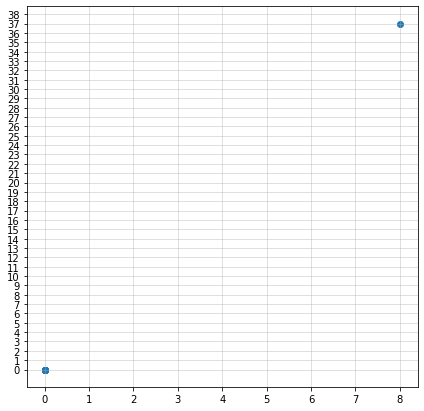

In [ ]:
fig = plt.figure()
fig.set_size_inches(7,7)
ax = fig.add_subplot(1, 1, 1)

x_ticks = np.arange(0, length, 1)
y_ticks = np.arange(0, breadth, 1)   # number of intervals


ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

plt.scatter(xconf,yconf)



ax.grid(which='both')
ax.grid(which='major', alpha=0.5)

plt.show()

In [ ]:
def checktarget():
    targetcount = 0
    for i in range(n_cand):
      if (xconf[i] ==0 and yconf[i] == 0):
        print('candidate ', i, 'has reached target!!!! :D')
        targetcount = targetcount +1
    return targetcount


#Generate Randdom terrain

In [ ]:
sidmatrix=[[50,50,50,50,50,50,50,50,50,50,50,50,50,50,50],
           [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50],
           [50,50,40,40,40,40,40,40,40,40,40,40,50,50,50],
           [50,40,30,20,20,20,20,20,20,20,20,30,40,50,50],
           [50,40,30,20,20,20,20,20,20,20,20,30,40,50,50],
           [50,50,40,40,40,40,40,40,40,40,40,40,50,50,50],
           [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50],
           [50,50,50,50,50,50,50,50,50,50,50,50,50,50,50]]
#sidmatrix = sidmatrix - 50

In [ ]:
sidmatrix1=[
           [50,52,52,52,52,52,52,52,52,52,51,50,50],
           [50,55,55,55,55,55,55,55,55,55,52,50,50],
           [50,55,55,61,61,61,61,61,61,61,61,55,50],
           [51,55,60,66,70,74,80,80,74,70,66,51,51],
           [52,55,60,67,72,76,82,82,76,72,68,54,52],
           [53,55,70,80,80,80,80,80,80,80,80,80,54],
           [54,58,75,87,87,87,87,87,87,87,87,80,54],
           [55,58,76,95,95,100,100,95,100,95,87,80,54],
           [54,57,77,87,87,87,87,87,87,87,87,80,53],
           [53,56,75,80,80,80,80,80,80,80,80,80,52],
           [52,55,70,80,75,80,80,75,80,75,75,75,51],
           [51,54,66,66,66,66,66,66,66,66,66,66,51],
           [50,52,61,61,61,61,61,61,61,61,61,55,50],
           [50,50,55,55,55,55,55,55,55,55,55,51,50],
           [50,50,51,52,52,53,54,53,52,51,51,50,50]]
#sidmatrix1 = sidmatrix1 - 50

In [ ]:
sidmatrix3=[[50,50,50,55,55,55,50,50,50,50],
           [50,50,55,55,55,55,55,55,50,50],
           [50,55,55,60,60,60,60,55,50,50],
           [50,55,60,60,65,65,60,60,55,50],
           [50,55,60,65,70,70,65,60,55,50],
           [50,55,60,60,65,65,60,60,55,50],
           [50,55,55,60,60,60,60,60,55,50],
           [50,50,55,55,55,55,55,55,51,50],
           [50,50,50,50,50,50,50,50,50,50]]
#sidmatrix = sidmatrix - 50

In [ ]:
sidmatrix = np.array(sidmatrix)
sidmatrix1 = np.array(sidmatrix1)
sidmatrix3 = np.array(sidmatrix3)

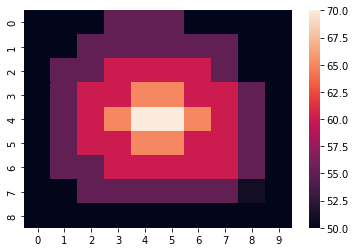

In [ ]:
hm = sn.heatmap(data = sidmatrix3)
# displaying the plotted heatmap
plt.show()

In [ ]:
n_obst = int(input("Enter number of obstacles: "))

Enter number of obstacles: 4


In [ ]:
matrix = np.ones((50,50))
matrix = matrix * 50

In [ ]:

for i in range (n_obst):
  obstchoice = np.random.randint(0,3)
  if (obstchoice == 0):
    obst = sidmatrix
  elif(obstchoice == 1):
    obst = sidmatrix1
  else:
    obst = sidmatrix3
  randx = np.random.randint(0,matrix.shape[0]-20)
  randy = np.random.randint(0,matrix.shape[1]-20)
  matrix[randx:randx+obst.shape[0], randy:randy+obst.shape[1]] = obst

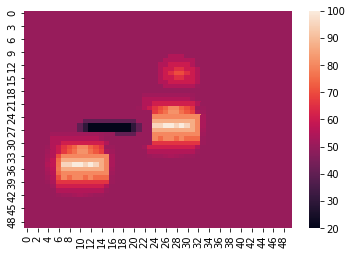

In [ ]:
import seaborn as sn
hm = sn.heatmap(data = matrix)

In [ ]:
rotated = np.rot90(matrix, -1)
flipped = np.flipud(matrix)

#INT MAIN

In [ ]:
n_cand = int(input("Enter number of candidates: "))

length = int(input("Length of Arena: "))
breadth = int(input("Breadth of Arena: ")) #for now keep both between 20 and 60


Enter number of candidates: 5
Length of Arena: 50
Breadth of Arena: 50


In [ ]:
xconf=[]
yconf=[]
for i in range(n_cand):
        temp_x=np.random.randint(0,length)
        temp_y=np.random.randint(0,breadth)
        # v,rec=check(rectconf,temp_x,temp_y)
        xconf.append(temp_x)
        yconf.append(temp_y)


In [ ]:
matrix

array([[50., 50., 50., ..., 50., 50., 50.],
       [50., 50., 50., ..., 50., 50., 50.],
       [50., 50., 50., ..., 50., 50., 50.],
       ...,
       [50., 50., 50., ..., 50., 50., 50.],
       [50., 50., 50., ..., 50., 50., 50.],
       [50., 50., 50., ..., 50., 50., 50.]])

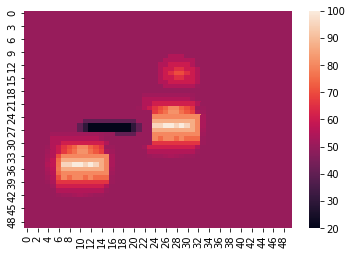

In [ ]:
import seaborn as sn
hm = sn.heatmap(data = matrix)

In [ ]:
all_x = []
all_y = []

iteration = 0
while (checktarget() != n_cand):
  print(xconf)
  print(yconf)

  all_x.append(xconf)    #All coordinates of all candidates
  all_y.append(yconf)

  iteration = iteration +1
  finalx, finaly = move(matrix, xconf, yconf)
  xconf = finalx
  yconf = finaly
  print('New x coordinates are \n', finalx, '\n')
  print('New y coordinates are \n', finaly, '\n')
all_x.append(finalx)    #All coordinates of all candidates
all_y.append(finaly)

Streaming output truncated to the last 5000 lines.
ALT DIFF IS  0.0
ALT DIFF IS  0.0
[0, 1, 0, 0, 0]
obstacles are at candidates  [0, 1, 0, 0, 0]
candidate  0 has reached target!!!! :D
candidate  2 has reached target!!!! :D
candidate  3 has reached target!!!! :D
candidate  4 has reached target!!!! :D
ALT DIFF IS  0.0
ALT DIFF IS  -3.0
OBSTACLE DETECTED IN FRONT OF CANDIDATE  1
ALT DIFF IS  0.0
ALT DIFF IS  0.0
ALT DIFF IS  0.0
[0, 1, 0, 0, 0]
obstacles are at candidates  [0, 1, 0, 0, 0]
candidate  0 has reached target!!!! :D
candidate  2 has reached target!!!! :D
candidate  3 has reached target!!!! :D
candidate  4 has reached target!!!! :D
ALT DIFF IS  0.0
ALT DIFF IS  0.0
ALT DIFF IS  0.0
ALT DIFF IS  0.0
ALT DIFF IS  0.0
[0, 0, 0, 0, 0]
obstacles are at candidates  [0, 0, 0, 0, 0]
OUTSIDE WHILE: NEW DIRECTIONS ARE  [270, 90, 270, 270, 270]
candidate  0 has reached target!!!! :D
candidate  2 has reached target!!!! :D
candidate  3 has reached target!!!! :D
candidate  4 has reached targ

KeyboardInterrupt: ignored

In [ ]:
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
color = get_colors(n_cand) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']

In [ ]:
# length = 40
# breadth = 50
def plotting(x , y, matrix):
    fig = plt.figure()
    fig.set_size_inches(length/4,breadth/4)
    ax = fig.add_subplot(1, 1, 1)


    x_ticks = np.arange(0, length, 1)
    y_ticks = np.arange(0, breadth, 1)   # number of intervals


    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)



    for j in range(len(all_x)):

      for i in range(n_cand):
        plt.scatter(x[j][i],y[j][i],c = color[i])
        continue
    plt.imshow(matrix)



    ax.grid(which='both')
    ax.grid(which='major', alpha=0.5)

    #plt.show()

    #fig = plt.figure()
    #return fig

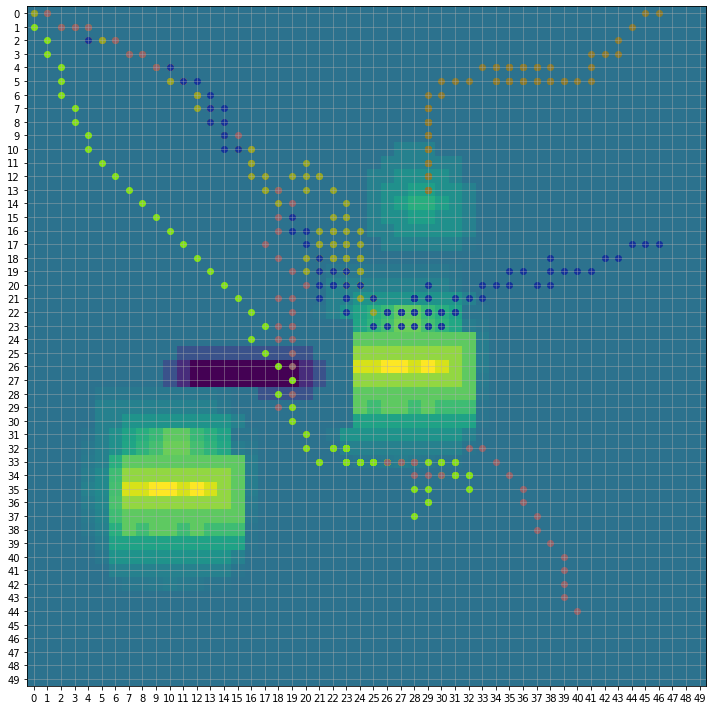

In [ ]:
plotting(all_x, all_y, matrix)

In [ ]:
# length = 40
# breadth = 50
import time

def single_plot(x , y,):    # single plotting sathi

    fig = plt.figure()
    fig.set_size_inches(length/4,breadth/4)
    ax = fig.add_subplot(1, 1, 1)

    x_ticks = np.arange(0, length, 1)
    y_ticks = np.arange(0, breadth, 1)   # number of intervals


    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.autoscale(enable=False)


    #for j in range(len(all_x)):
    for k in range(0,n_cand):
       plt.scatter(x[k],y[k],c = color[k])
    plt.imshow(matrix)
    #plt.scatter(x,y)



    ax.grid(which='both')
    ax.grid(which='major', alpha=0.2)
    ax.autoscale(enable=False)
    ax.set_facecolor("lightcyan")

    #plt.show()

    fig = plt.figure()
    plt.clf()
    plt.show()
    #plt.clf()
    return fig

In [ ]:
from IPython.display import clear_output
for i in range(iteration+1):
  single_plot(all_x[i], all_y[i])
  clear_output(wait=True)